# Final Project Report

#### STATS 102 Introduction to Data Science Session 1, 2023 Fall

---

# Project Title: Machine Learning for Predicting Crop Yield: A Study Based on 1990-2016 Crop Yield and Weather Data


- Yufan Gao (yg191@duke.edu)
- Jianing Tian (jt353@duke.edu)

## 1 Introduction

Write the introduction of your project here to make the reader understand what you set out to do and what you achieved.



(1) General introduction

(2) Problems and Models Description

(3) Expected Outcomes and Achievements

## 2 Background 

Write the relevant background information (the related work or state of the art in the area) about your project.

(1) Background information

(2) Innovation and Gaps

## 3 Design and Implementation

### Data collection, preprocessing and cleaning 

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ingesting the datasets 
pest_df=pd.read_csv('pesticides.csv')
rain_df=pd.read_csv('rainfall.csv')
temp_df=pd.read_csv('temp.csv')
yield_df=pd.read_csv('yield.csv')
data_frames=[pest_df,rain_df,temp_df,yield_df]

#reading a sample set of rows for all the ingested datasets 
for df in data_frames:
    print('A sample set of rows for {} is:\n'.format(df))#printing the name of the dataset
    display(df.sample(6))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
A sample set of rows for               Domain      Area Element                Item  Year  \
0     Pesticides Use   Albania     Use  Pesticides (total)  1990   
1     Pesticides Use   Albania     Use  Pesticides (total)  1991   
2     Pesticides Use   Albania     Use  Pesticides (total)  1992   
3     Pesticides Use   Albania     Use  Pesticides (total)  1993   
4     Pesticides Use   Albania     Use  Pesticides (total)  1994   
...              ...       ...     ...                 ...   ...   

,Domain,Area,Element,Item,Year,Unit,Value
1726,Pesticides Use,Haiti,Use,Pesticides (total),2007,tonnes of active ingredients,27.85
2873,Pesticides Use,Niger,Use,Pesticides (total),2000,tonnes of active ingredients,62.00
2778,Pesticides Use,Netherlands,Use,Pesticides (total),2013,tonnes of active ingredients,10720.17
4101,Pesticides Use,United Kingdom,Use,Pesticides (total),2016,tonnes of active ingredients,19277.79
2942,Pesticides Use,Occupied Palestinian Territory,Use,Pesticides (total),2015,tonnes of active ingredients,1645.42
1843,Pesticides Use,India,Use,Pesticides (total),2016,tonnes of active ingredients,50410.00


A sample set of rows for              Area  Year average_rain_fall_mm_per_year
0     Afghanistan  1985                           327
1     Afghanistan  1986                           327
2     Afghanistan  1987                           327
3     Afghanistan  1989                           327
4     Afghanistan  1990                           327
...           ...   ...                           ...
6722     Zimbabwe  2013                           657
6723     Zimbabwe  2014                           657
6724     Zimbabwe  2015                           657
6725     Zimbabwe  2016                           657
6726     Zimbabwe  2017                           657

[6727 rows x 3 columns] is:



,Area,Year,average_rain_fall_mm_per_year
3806,Maldives,2011,1972
652,Bermuda,1986,NaN
40,Albania,1995,1485
3103,Kazakhstan,1989,250
3387,Latvia,1994,641
6301,Ukraine,1994,565


A sample set of rows for        year        country  avg_temp
0      1849  Côte D'Ivoire     25.58
1      1850  Côte D'Ivoire     25.52
2      1851  Côte D'Ivoire     25.67
3      1852  Côte D'Ivoire       NaN
4      1853  Côte D'Ivoire       NaN
...     ...            ...       ...
71306  2009         Mexico     21.76
71307  2010         Mexico     20.90
71308  2011         Mexico     21.55
71309  2012         Mexico     21.52
71310  2013         Mexico     22.19

[71311 rows x 3 columns] is:



,year,country,avg_temp
54348,2002,United States,15.62
70596,1980,Côte D'Ivoire,25.86
71177,1880,Mexico,20.26
54977,1762,Latvia,5.20
53205,1960,China,12.70
30525,1881,United States,11.87


A sample set of rows for       Domain Code Domain  Area Code         Area  Element Code Element  \
0              QC  Crops          2  Afghanistan          5419   Yield   
1              QC  Crops          2  Afghanistan          5419   Yield   
2              QC  Crops          2  Afghanistan          5419   Yield   
3              QC  Crops          2  Afghanistan          5419   Yield   
4              QC  Crops          2  Afghanistan          5419   Yield   
...           ...    ...        ...          ...           ...     ...   
56712          QC  Crops        181     Zimbabwe          5419   Yield   
56713          QC  Crops        181     Zimbabwe          5419   Yield   
56714          QC  Crops        181     Zimbabwe          5419   Yield   
56715          QC  Crops        181     Zimbabwe          5419   Yield   
56716          QC  Crops        181     Zimbabwe          5419   Yield   

       Item Code   Item  Year Code  Year   Unit  Value  
0             56  Maize      

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
30310,QC,Crops,129,Madagascar,5419,Yield,83,Sorghum,1992,1992,hg/ha,6982
22780,QC,Crops,175,Guinea-Bissau,5419,Yield,489,Plantains and others,1973,1973,hg/ha,30120
30461,QC,Crops,129,Madagascar,5419,Yield,15,Wheat,2004,2004,hg/ha,23454
13922,QC,Crops,49,Cuba,5419,Yield,116,Potatoes,1979,1979,hg/ha,153728
4019,QC,Crops,23,Belize,5419,Yield,83,Sorghum,2015,2015,hg/ha,22071
35896,QC,Crops,153,New Caledonia,5419,Yield,15,Wheat,1990,1990,hg/ha,7317


In [2]:
pest_df=pest_df.drop(['Unit','Domain','Element','Item'],axis=1)
pest_df.head()

,Area,Year,Value
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [3]:
yield_df=yield_df.drop(['Domain Code','Domain','Area Code','Element Code','Item Code','Year Code','Unit'],axis=1)
yield_df.head()

,Area,Element,Item,Year,Value
0,Afghanistan,Yield,Maize,1961,14000
1,Afghanistan,Yield,Maize,1962,14000
2,Afghanistan,Yield,Maize,1963,14260
3,Afghanistan,Yield,Maize,1964,14257
4,Afghanistan,Yield,Maize,1965,14400


In [4]:
rain_df = rain_df.rename(index=str, columns={" Area": 'Area'})
# convert average_rain_fall_mm_per_year from object to float
rain_df['average_rain_fall_mm_per_year'] = pd.to_numeric(rain_df['average_rain_fall_mm_per_year'],errors = 'coerce')
rain_df = rain_df.dropna()
rain_df.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327.0
1,Afghanistan,1986,327.0
2,Afghanistan,1987,327.0
3,Afghanistan,1989,327.0
4,Afghanistan,1990,327.0


In [5]:
temp_df.rename(columns = {'year':'Year','country':'Area'},inplace = True)
temp_df.columns

Index(['Year', 'Area', 'avg_temp'], dtype='object')

In [6]:
# Merging our datasets into 1 single dataframe
yield_df2 = pd.read_csv('yield_df.csv')
# Perform the chained merging of DataFrames
df2 = yield_df.merge(pest_df, on=['Year', 'Area'])\
                   .merge(rain_df, on=['Year', 'Area'])\
                   .merge(temp_df, on=['Year', 'Area'])
print(df2.columns)
df2.sample(10)
df2.info()

Index(['Area', 'Element', 'Item', 'Year', 'Value_x', 'Value_y',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Element                        28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   Value_x                        28242 non-null  int64  
 5   Value_y                        28242 non-null  float64
 6   average_rain_fall_mm_per_year  28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df2.rename(columns={'Value_y':'pesticides_tonnes','Value_x':'hg/ha_yield'},inplace=True)
df2=df2.drop('Element',axis=1)
yield_df2=yield_df2.drop('Unnamed: 0',axis=1)
print(yield_df2.columns)
print(df2.columns)

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')
Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'pesticides_tonnes',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')


In [8]:
df2.shape, yield_df2.shape

((28242, 7), (28242, 7))

In [9]:
df2.describe()

,Year,hg/ha_yield,pesticides_tonnes,average_rain_fall_mm_per_year,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000
mean,2001.544296,77053.332094,37076.909344,1149.05598,20.542627
std,7.051905,84956.612897,59958.784665,709.81215,6.312051
min,1990.000000,50.000000,0.040000,51.00000,1.300000
25%,1995.000000,19919.250000,1702.000000,593.00000,16.702500
50%,2001.000000,38295.000000,17529.440000,1083.00000,21.510000
75%,2008.000000,104676.750000,48687.880000,1668.00000,26.000000
max,2013.000000,501412.000000,367778.000000,3240.00000,30.650000


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB



The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries.

# Data Analysis

In [11]:
num_cols = [i for i in df2.columns if (df2[i].dtype == 'float64' or df2[i].dtype == 'int64')]
cat_cols = [i for i in df2.columns if (i not in num_cols) and i != 'hg/ha_yield']
print(num_cols)
print(cat_cols)

['Year', 'hg/ha_yield', 'pesticides_tonnes', 'average_rain_fall_mm_per_year', 'avg_temp']
['Area', 'Item']


In [12]:
df2['Area'].nunique() 
df2.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

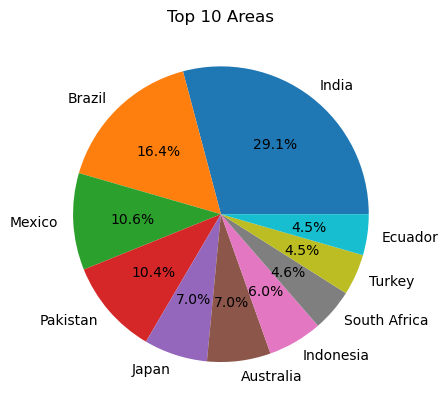

In [38]:
ax = df2['Area'].value_counts()[:10].plot(kind='pie', autopct='%.1f%%')
plt.title('Top 10 Areas')
plt.ylabel('')
plt.show()

In [14]:
df2.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

India has the highest yield production in the dataset. India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.

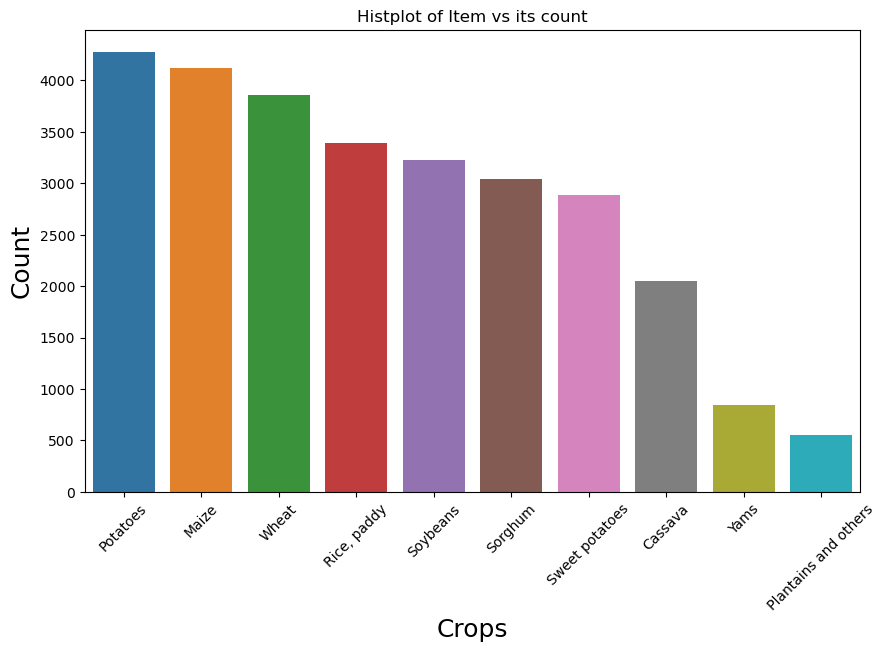

In [15]:
sorted_order = df2['Item'].value_counts().index
plt.figure(figsize=(10,6))
sns.countplot(x='Item', data=df2, order=sorted_order)
plt.title('Histplot of Item vs its count')
plt.xlabel('Crops', fontsize=18, loc='center')
plt.ylabel('Count', fontsize=18, loc='center')
plt.xticks(rotation=45)
plt.show()


#############
Confused about the boxplot.
#############

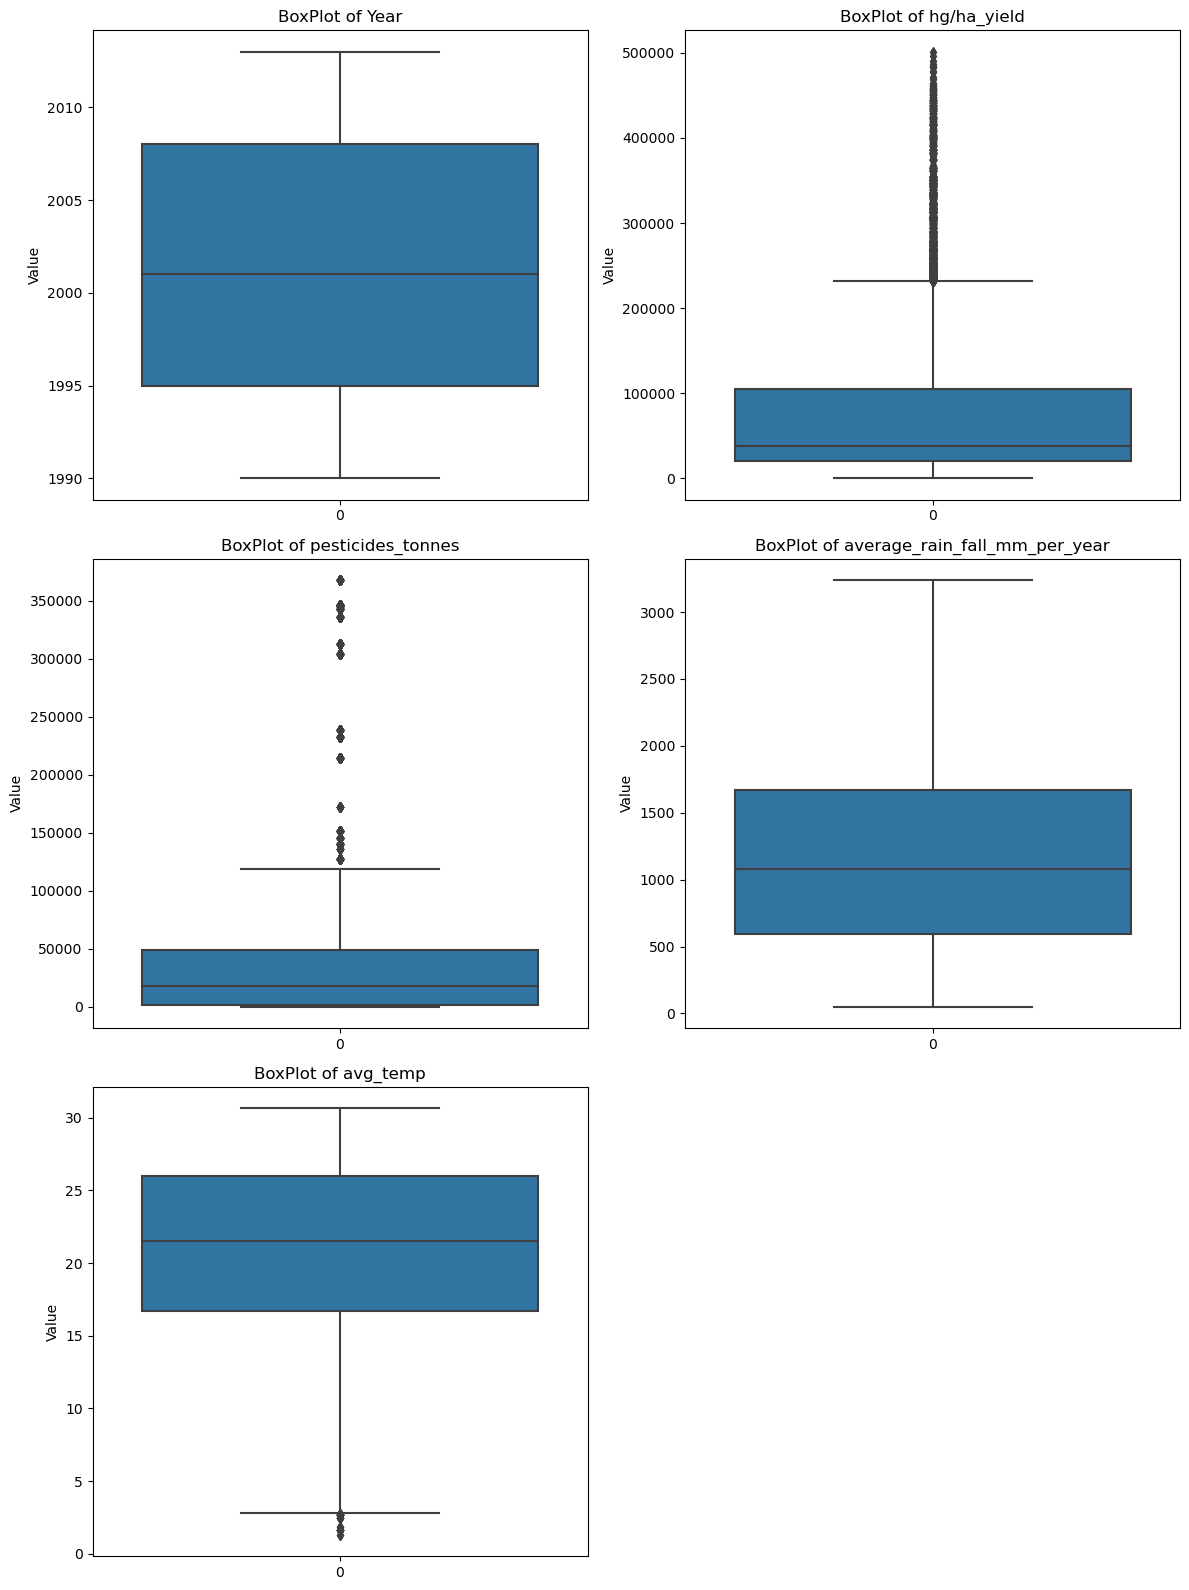

In [16]:
plt.figure(figsize=(12, 16))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df2[col])
    plt.title(f'BoxPlot of {col}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

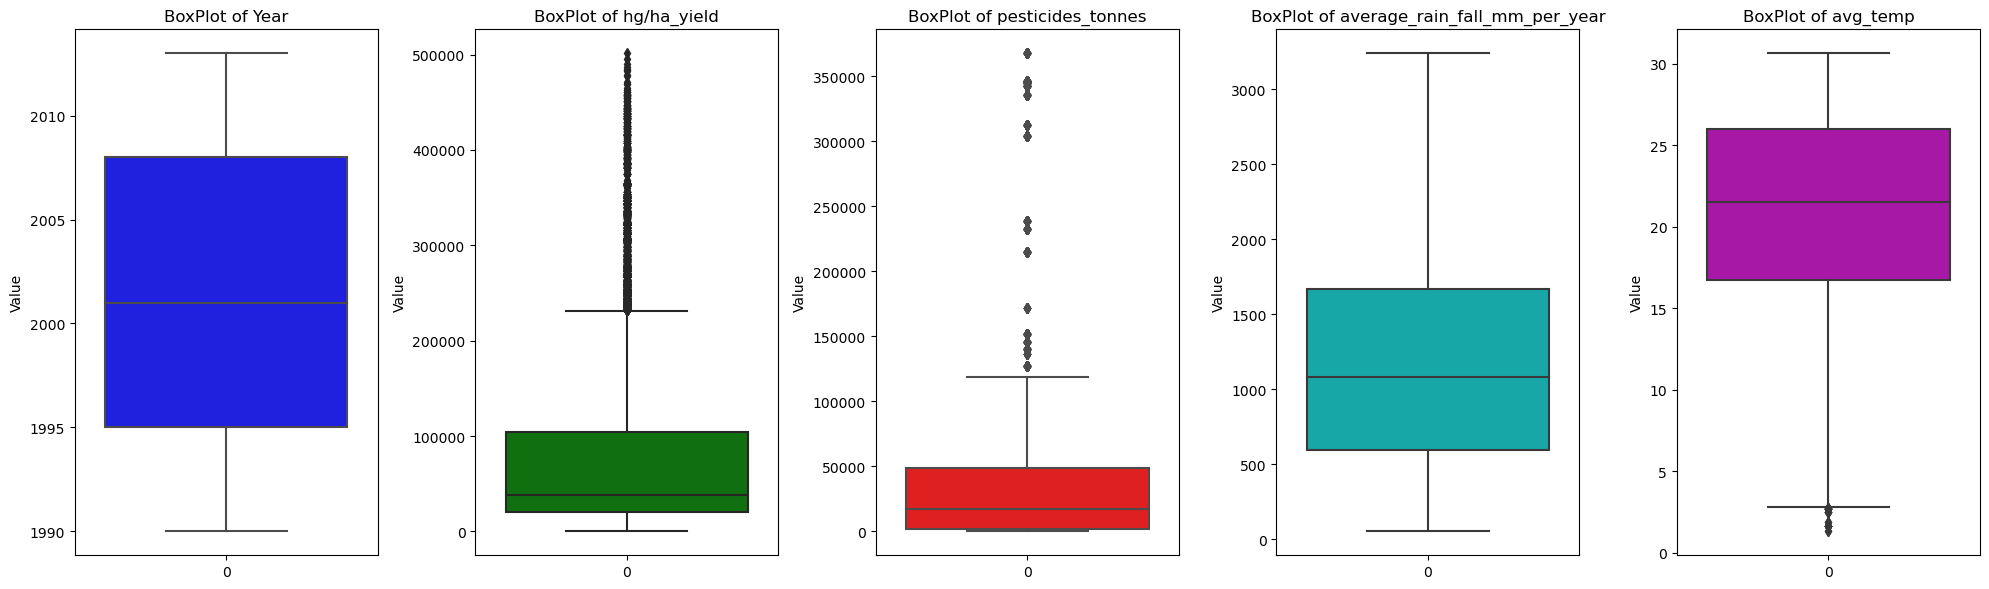

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of different colors for each subplot
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Initialize the figure with desired size
plt.figure(figsize=(20, 6))

# Loop through numerical columns for plotting
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(data=df2[col], color=colors[i % len(colors)])
    plt.title(f'BoxPlot of {col}')
    plt.ylabel('Value')

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()


# Data Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop unnecessary columns and separate features and labels
X, y = df2.drop(['Year', 'hg/ha_yield'], axis=1), df2['hg/ha_yield']

# One-hot encode and standardize the data
X = StandardScaler().fit_transform(pd.get_dummies(X, columns=cat_cols, drop_first=True))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20, shuffle=True)

# Display the shape of the training and testing sets
print(X_train.shape, X_test.shape)


(22593, 112) (5649, 112)


Cross-validation offers a robust method to evaluate the predictive performance of your machine learning model. It helps in ensuring that the model generalizes well to new, unseen data, thereby mitigating the risk of overfitting.

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Output the cross-validation scores
print("5-fold cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mcs = cv_scores.mean()
sd_cv_score = cv_scores.std()

# Output mean and standard deviation
print("Mean CV score:", mcs)
print("Standard deviation of CV scores:", sd_cv_score)


5-fold cross-validation scores: [0.97456141 0.97145513 0.97456422 0.97710081 0.97041669]
Mean CV score: 0.9736196486855955
Standard deviation of CV scores: 0.002401735478026509


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    # 'max_depth': [None, 10, 20, 30, 40, 50],
    # 'min_samples_split': [2, 5, 10],
}

# Create the base model
rf = RandomForestRegressor()

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


? Best_score no refers to R-square. Mean CV score = best score

In [17]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Initialize model parameters
model_params = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.1, 1.0, 10.0]},
    'XGBoost_Regressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
    'Support Vector Regressor': {}
}

# Initialize models with their names
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'XGBoost_Regressor': XGBRegressor(),
    'Support Vector Regressor': SVR()
}

# Initialize a dictionary to hold the best_scores and adjusted R^2 for each model
results = {}

# Number of observations and predictors
n = len(y_train)
k = X_train.shape[1]

# Perform 5-fold cross-validation, hyperparameter tuning, and calculate adjusted R^2
for name, model in tqdm(models.items()):
    grid_search = GridSearchCV(model, model_params[name], cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
    mcs = cv_scores.mean()
    adjusted_r2 = 1 - ((1 - mcs) * (n - 1) / (n - k - 1))
    
    results[name] = {
        'best_score': mcs,
        'best_params': grid_search.best_params_,
        'adjusted_R^2': adjusted_r2
    }

# Display the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  best_score: {metrics['best_score']}")
    print(f"  best_params: {metrics['best_params']}")
    print(f"  adjusted_R^2: {metrics['adjusted_R^2']}\n")

 20%|██        | 1/5 [00:00<00:03,  1.06it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


 40%|████      | 2/5 [00:01<00:01,  1.80it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.552e+12, tolerance: 1.281e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.459e+12, tolerance: 1.324e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.906e+12, toleranc

Linear Regression:
  best_score: 0.7453691933617008
  best_params: {}
  adjusted_R^2: 0.7441005701257805

Ridge Regression:
  best_score: 0.7453747639624202
  best_params: {'alpha': 10.0}
  adjusted_R^2: 0.7441061684803825

Lasso Regression:
  best_score: 0.7453826929679849
  best_params: {'alpha': 10.0}
  adjusted_R^2: 0.7441141369898894

XGBoost_Regressor:
  best_score: 0.9688175636079226
  best_params: {'learning_rate': 0.5, 'n_estimators': 200}
  adjusted_R^2: 0.9686622062735848

Support Vector Regressor:
  best_score: -0.20506850164513274
  best_params: {}
  adjusted_R^2: -0.2110724016533292



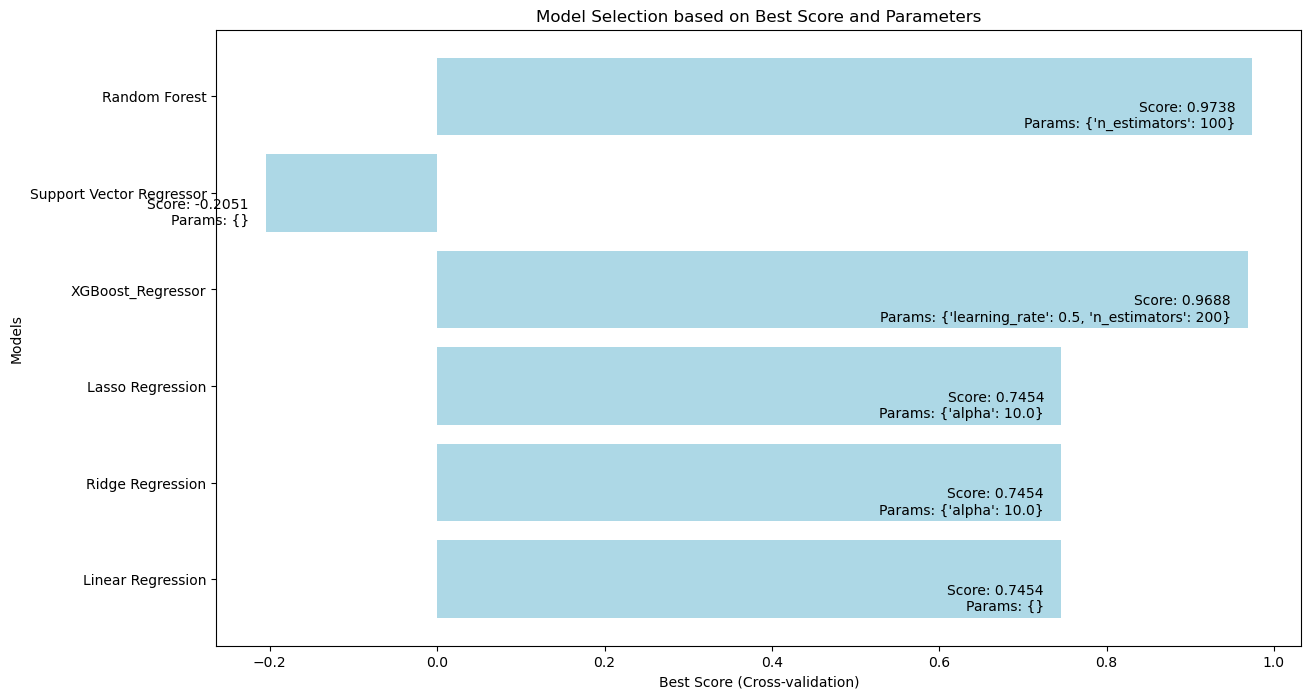

In [27]:
# Add Random Forest result manually
results['Random Forest'] = {
    'best_score': 0.9737707954203294,
    'best_params': {'n_estimators': 100},
    'adjusted_R^2': None  # Replace None if you have the value for adjusted R^2
}

plt.figure(figsize=(14, 8))
bars = plt.barh(model_names, best_scores, color='lightblue')

# Annotate the bars with best parameters and scores
for bar, score, param in zip(bars, best_scores, best_params):
    plt.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height()/4, 
             f'Score: {round(score, 4)}\nParams: {param}', 
             va='center', ha='right', color='black')

# Add labels and title
plt.xlabel('Best Score (Cross-validation)')
plt.ylabel('Models')
plt.title('Model Selection based on Best Score and Parameters')

# Show the plot
plt.show()


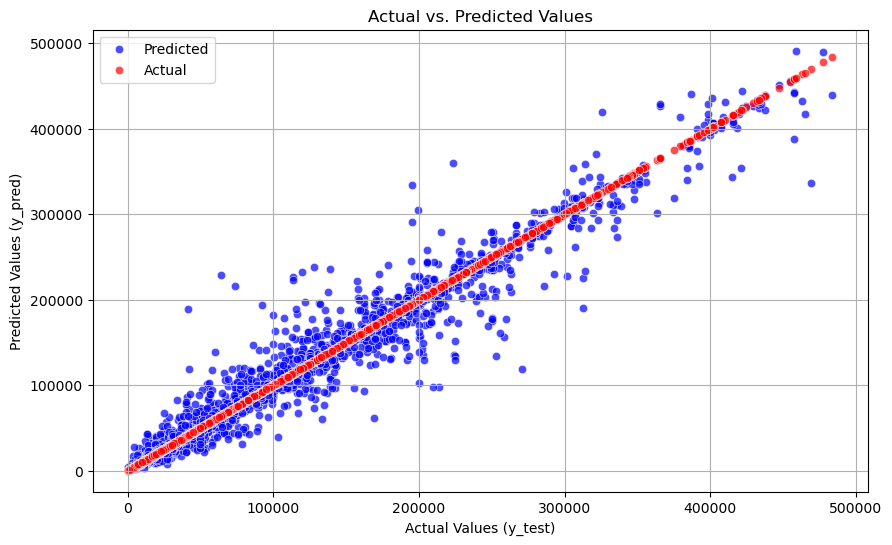

In [23]:
best_model=RandomForestRegressor(n_estimators=100)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue', label='Predicted')
sns.scatterplot(x=y_test, y=y_test, alpha=0.7, color='red', label='Actual')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.show()

## 4 Results

## 5 Conclusions 

(1) Conclusions

(2) Limitation

## 6 Individual Contribution 

Write the individual contribution here.

## References

Everything you cite from other sources should be properly referenced. 

APA style is used here: https://irsc.libguides.com/apa

## Appendix

Code or something else you want to put in the appendix.